In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [273]:
dados = pd.read_csv('dados/dados_api.csv')
dados.head()

,DAT_MED,VEN_VEL,TEM_INS,UMD_INS,HR_MED
0,2012-01-01,1.1,26.6,81.0,0
1,2012-01-01,0.8,26.3,81.0,100
2,2012-01-01,0.7,26.2,82.0,200
3,2012-01-01,0.2,26.0,83.0,300
4,2012-01-01,0.7,25.6,85.0,400


In [274]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86208 entries, 0 to 86207
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0           DAT_MED  86208 non-null  object 
 1   VEN_VEL          84751 non-null  float64
 2   TEM_INS          84797 non-null  float64
 3   UMD_INS          84536 non-null  float64
 4   HR_MED           86208 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 3.3+ MB


In [275]:
dados.dtypes

        DAT_MED     object
VEN_VEL            float64
TEM_INS            float64
UMD_INS            float64
HR_MED               int64
dtype: object

In [276]:
dados.columns = ['data','vento','temperatura','umidade','hora']

In [277]:
dados.head()

,data,vento,temperatura,umidade,hora
0,2012-01-01,1.1,26.6,81.0,0
1,2012-01-01,0.8,26.3,81.0,100
2,2012-01-01,0.7,26.2,82.0,200
3,2012-01-01,0.2,26.0,83.0,300
4,2012-01-01,0.7,25.6,85.0,400


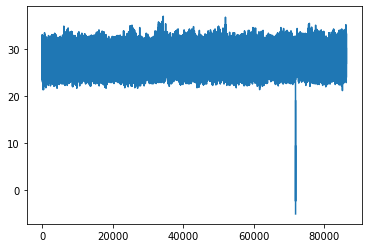

In [278]:
dados['temperatura'].plot()

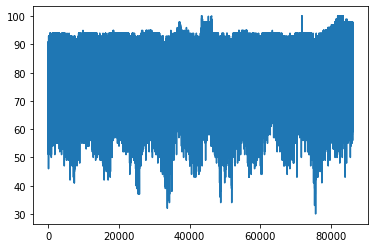

In [279]:
dados['umidade'].plot()

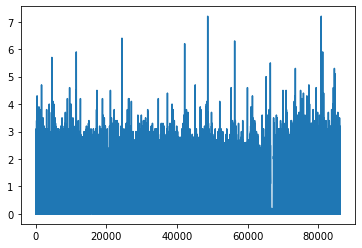

In [280]:
dados['vento'].plot()

In [304]:
dados_novos = dados.iloc[0:55000]

In [305]:
len(dados_novos)

55000

In [306]:
len(dados)

86208

In [307]:
len(dados_novos)

55000

In [325]:
dados_novos.describe()

,index,vento,temperatura,umidade,hora
count,54091.000000,54091.000000,54091.000000,54091.000000,54091.000000
mean,27574.578322,0.768851,26.800379,80.334362,1153.293524
std,15919.143662,0.746234,2.867733,12.804984,692.109622
min,0.000000,0.000000,21.400000,32.000000,0.000000
25%,13769.500000,0.100000,24.400000,70.000000,600.000000
50%,27794.000000,0.600000,25.900000,85.000000,1200.000000
75%,41334.500000,1.300000,29.100000,91.000000,1800.000000
max,54999.000000,7.200000,37.000000,100.000000,2300.000000


In [326]:
dados_novos = dados_novos.loc[dados['umidade']>=0]
dados_novos = dados_novos.loc[dados['vento']>=0]
dados_novos = dados_novos.loc[dados['temperatura']>=0]

In [327]:
dados_novos.describe()

,index,vento,temperatura,umidade,hora
count,53182.000000,53182.000000,53182.000000,53182.000000,53182.000000
mean,27643.189293,0.768689,26.801194,80.310218,1153.016058
std,15961.425433,0.746004,2.869554,12.814132,693.501917
min,0.000000,0.000000,21.400000,32.000000,0.000000
25%,13787.250000,0.100000,24.400000,70.000000,600.000000
50%,27907.500000,0.600000,25.900000,85.000000,1200.000000
75%,41419.750000,1.300000,29.100000,91.000000,1800.000000
max,54999.000000,6.400000,37.000000,100.000000,2300.000000


In [328]:
dados_novos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53182 entries, 0 to 54090
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        53182 non-null  int64  
 1   data         53182 non-null  object 
 2   vento        53182 non-null  float64
 3   temperatura  53182 non-null  float64
 4   umidade      53182 non-null  float64
 5   hora         53182 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 2.8+ MB


In [312]:
dados_novos.plot(y = ['temperatura'], x = ['hora'])

ValueError: x must be a label or position

In [313]:
x = dados_novos.drop(['vento','umidade'],axis = 1)

In [314]:
x.index = x['hora']

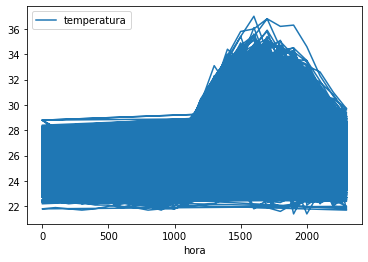

In [315]:
x.plot(y =['temperatura'])

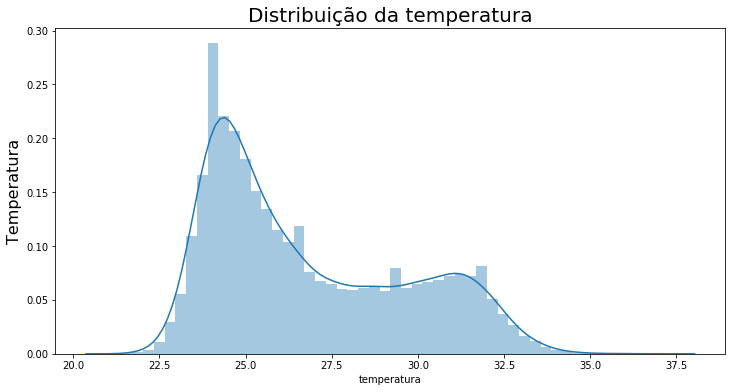

In [329]:
ax = sns.distplot(dados_novos['temperatura'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da temperatura', fontsize=20)
ax.set_ylabel('Temperatura', fontsize=16)
ax

In [317]:
dados_novos.head()

,data,vento,temperatura,umidade,hora
0,2012-01-01,1.1,26.6,81.0,0
1,2012-01-01,0.8,26.3,81.0,100
2,2012-01-01,0.7,26.2,82.0,200
3,2012-01-01,0.2,26.0,83.0,300
4,2012-01-01,0.7,25.6,85.0,400


In [330]:

dados_novos = dados_novos.reset_index()
y = dados_novos['temperatura']

In [331]:
X = dados_novos[['umidade','vento','hora']]

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [333]:
modelo = LinearRegression()

In [334]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [335]:
previsao = modelo.predict(X_test)

In [336]:
print('R² = %s' % metrics.r2_score(y_test,previsao))

R² = 0.9063000927081266


In [337]:
modelo.fit(X_train,y_train)
previsao = modelo.predict(X_test)
df_previsao = pd.DataFrame(previsao.round(2))
df_previsao.columns = ['previsao']
df_previsao
print('R² = %s' % metrics.r2_score(y_test,previsao))

R² = 0.9063000927081266


In [338]:
y_test.index = range(13339)
tabela = pd.concat([df_previsao,y_test])

ValueError: Length mismatch: Expected axis has 15955 elements, new values have 13339 elements

In [ ]:
tabela